# Notebook Title

[Formatting Data](#Formatting Data)

[Visualizing data](#Visualizing Data)

[Splitting Data](#Splitting Data)

[Modeling Data](#Modeling Data)

[Model Validation](#Model Validation)

## Formatting Data

<a id='Formatting Data'></a>

In [1]:
import numpy as np#Math library
import pandas as pd#Table library
import matplotlib.pyplot as plt#Plotting library
import pandas as pd
import warnings
import seaborn as sns#Plotting library
warnings.filterwarnings('ignore')#Gets rid of popup warnings
%matplotlib nbagg

In [2]:
table1= pd.read_csv('Fraud/Fraud_Data.csv')
table2= pd.read_csv('Fraud/IpAddress_to_Country.csv')
table1.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1


In [3]:
table2.head(3)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China


In [4]:
table1.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [5]:
table1.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Ok data looks fine (don't see errors for nans or Infs. Now let's see if can start doing the tasks.)

## Determine Country Based on IP

<a id='Determine Country Based on IP'></a>

In [35]:
table1.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1


In [80]:
table1.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [99]:
myIP= table1['ip_address'].values
low= table2['lower_bound_ip_address'].values
high= table2['upper_bound_ip_address'].values

lowDiff= [min(myIP[i]-low) for i in range(0,len(myIP))]

KeyboardInterrupt: 

In [101]:
list1= np.arange(1,10)
list2= np.arange(5,15)

In [103]:
val1= 7
countries= []
for i in range(0,len(list1)):
    if list1[i] < val1 < list2[i]:
        print True
        countries.append()
    else: print False

False
False
False
True
True
True
False
False
False


In [120]:
myIP= table1['ip_address'].values
low= table2['lower_bound_ip_address'].values
high= table2['upper_bound_ip_address'].values
countries= table2['country'].values
ipCountry= []


for i in range(0,len(myIP)):
    #print i
    for j in range(0,len(low)):
        if low[j] < myIP[i] and myIP[i] < high[j]:
            #print True
            ipCountry.append(countries[j])

In [118]:
ipCountry

['Thailand', 'Australia']

In [119]:
list1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
table2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [86]:
def searchRange(val,l1,l2):
    if l1 < val < l2:
        return val
    else: return False

In [88]:
print searchRange(5,4,7)

5


In [100]:
#This should work but not getting it to work at the moment, for now I'll just do each step manually
#table1['country']= table1['ip_address'].map(lambda x: table2[table2['lower_bound_ip_address']== low[low < x].min()])
for i in range(10,len(myIP)):
    print table2[table2['lower_bound_ip_address']== low[low < myIP[i]].max()]['country']


32983    United States
Name: country, dtype: object
138845    Australia
Name: country, dtype: object
138845    Australia
Name: country, dtype: object
58477    Brazil
Name: country, dtype: object
138845    Australia
Name: country, dtype: object
6279    India
Name: country, dtype: object
131505    United States
Name: country, dtype: object


ValueError: zero-size array to reduction operation maximum which has no identity

In [99]:
low[low < myIP[2]].max()
#myIP[3] in low

2621440000.0

In [13]:
list1= [1,8,2,5,13,24,16,44]
list1 > 9
list2

9

In [14]:
list1[list1>=3]

8

In [64]:
print myIP[0]
print low[low > myIP[0]].min()
print high[high < myIP[0]].max()
#print table2[table2['lower_bound_ip_address']== low[low > myIP[0]].min()]['country']
print low[low > myIP[0]].min()


732758368.8
734003200.0
729808895
734003200.0


## Model to Predict Fraud Activity

<a id='Model to Predict Fraud Activity'></a>

For this project I'll say that 1 equals to fraud and that 0 equals to no fraud. Let's first check if our dataset is balanced.

In [67]:
table1.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1


Oof they're heavily imbalanced! Roughly a tenth of our entries are fraud. I think logistic regression could be useful here, though we'd need to 

In [38]:
table3= table1.copy()
for elem in table3['source'].unique():
    table3[str(elem)] = table3['source'] == elem
table3.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,SEO,Ads,Direct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,True,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,False,True,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,True,False,False


Sweet, now let's do the same for sex and browser and check if device_id has limited unique values to do this as well.

In [39]:
for elem in table3['browser'].unique():
    table3[str(elem)] = table3['browser'] == elem
table3.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,SEO,Ads,Direct,Chrome,Opera,Safari,IE,FireFox
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,True,False,False,True,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,False,True,False,True,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,True,False,False,False,True,False,False,False


In [40]:
len(table3['device_id'].unique())

137956

Nope guess not. What we can do now is remove the non numerical categories.

In [41]:
table3= table3.drop(['device_id','source','browser','sex','signup_time','purchase_time'], axis=1)

In [42]:
table3.head(3)

,user_id,purchase_value,age,ip_address,class,SEO,Ads,Direct,Chrome,Opera,Safari,IE,FireFox
0,22058,34,39,7.327584e+08,0,True,False,False,True,False,False,False,False
1,333320,16,53,3.503114e+08,0,False,True,False,True,False,False,False,False
2,1359,15,53,2.621474e+09,1,True,False,False,False,True,False,False,False


In [43]:
table3.dtypes

user_id             int64
purchase_value      int64
age                 int64
ip_address        float64
class               int64
SEO                  bool
Ads                  bool
Direct               bool
Chrome               bool
Opera                bool
Safari               bool
IE                   bool
FireFox              bool
dtype: object

In [82]:
table3[table3['user_id'] == 1359]

,user_id,purchase_value,age,ip_address,class,SEO,Ads,Direct,Chrome,Opera,Safari,IE,FireFox
2,1359,15,53,2.621474e+09,1,True,False,False,False,True,False,False,False


In [69]:
print len(table1[table1['class']==0])
print len(table1[table1['class']==1])

136961
14151


In [44]:
from sklearn.cross_validation import KFold, train_test_split
train, test= train_test_split(table3, test_size= 0.3, random_state= 42)

In [49]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(class_weight = 'balanced')
logreg.fit(preprocessing.scale(train.ix[:, train.columns != 'class']), train['class'])
logpred= forfit.predict(preprocessing.scale(test.ix[:, test.columns != 'class']))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


randfor= RandomForestClassifier(n_estimators= 100)
forfit= randfor.fit(preprocessing.scale(train.ix[:, train.columns != 'class']), train['class'])
forpred= forfit.predict(preprocessing.scale(test.ix[:, test.columns != 'class']))


<IPython.core.display.Javascript object>


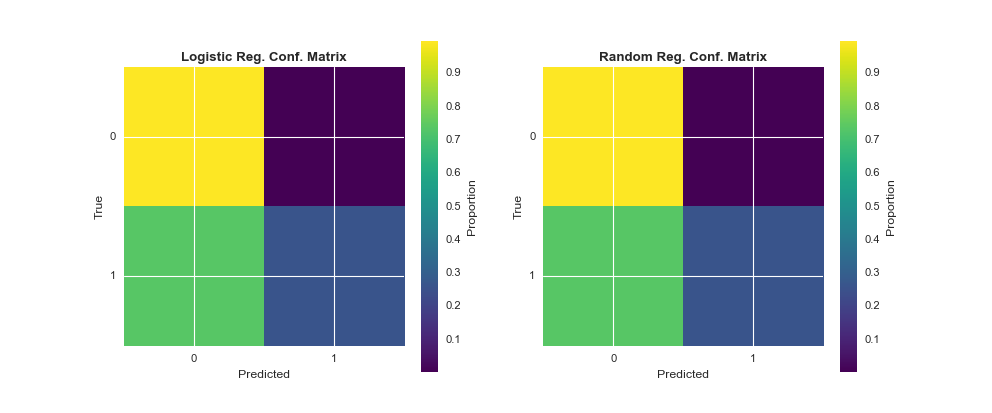

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

confMatrixLog= confusion_matrix(test['class'], logpred)#Confusion matrix for logistic regression model 
cmLogNorm = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]#Normalized model

confMatrixRand= confusion_matrix(test['class'], logpred)#Confusion matrix for randfor regression model 
cmRandNorm = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]#Normalized model

plt.subplot(1,2,1)
plt.imshow(cmLogNorm, interpolation='nearest', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(np.arange(0,2))
plt.yticks(np.arange(0,2))
plt.colorbar(label='Proportion')
plt.title('Logistic Reg. Conf. Matrix', fontweight= 'bold')

#----------Random Forest
plt.subplot(1,2,2)
plt.imshow(cmRandNorm, interpolation='nearest', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(np.arange(0,2))
plt.yticks(np.arange(0,2))
plt.colorbar(label='Proportion')
plt.title('Random Reg. Conf. Matrix', fontweight= 'bold')

In [58]:
print confMatrixLog
print confMatrixRand

[[40967   150]
 [ 3122  1095]]
[[40967   150]
 [ 3122  1095]]


Wow so the guesses were identical for both logistic regression and for random forest.

In [59]:
importances = randfor.feature_importances_
importanceDF= pd.DataFrame()
importanceDF['features']= test.ix[:, test.columns != 'class'].columns
importanceDF['importance']= importances
importanceDF

,features,importance
0,user_id,0.272395
1,purchase_value,0.200884
2,age,0.156405
3,ip_address,0.341569
4,SEO,0.003836
5,Ads,0.004093
6,Direct,0.002778
7,Chrome,0.003904
8,Opera,0.001888
9,Safari,0.004293


In [60]:
rankImportance= importanceDF.sort_values(by='importance', ascending= False)

<IPython.core.display.Javascript object>


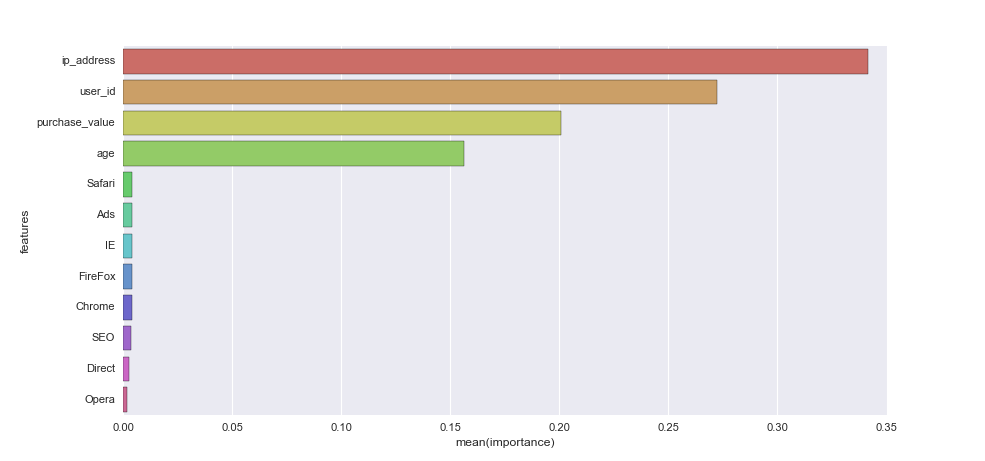

In [61]:
import seaborn as sns
sns.barplot(y="features", x="importance", data=rankImportance, palette= 'hls')

## Formatting Data

<a id='Formatting Data'></a>

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

logPredprob= logreg.predict_proba(test.ix[:, test.columns != 'class'])
logregFpr, logregTpr, rocThresh= roc_curve(test['class'],logPredprob[:,1])

In [78]:
accuracy_score(test['class'],logpred)

0.92782459081484092

<IPython.core.display.Javascript object>


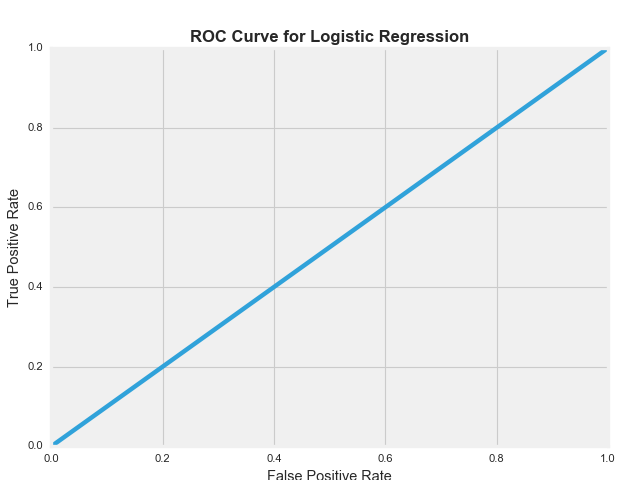

In [79]:
plt.style.use('fivethirtyeight')
logregRocPlot,= plt.plot(logregFpr,logregTpr, label='3 Feat. Log. Reg. Model')
#guessPlot,= plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize= 13)
plt.ylabel('True Positive Rate', fontsize= 13)
plt.title('ROC Curve for Logistic Regression', size= 15, fontweight= 'bold')
#plt.legend([logregRocPlot, guessPlot], ['Log. Reg. Model','Random Guess'], loc=4, fontsize= 13)

In [72]:
print sum(logpred-test['class'])
#zip(logpred, test['class'])

-2972


## Formatting Data

<a id='Formatting Data'></a>